<a href="https://colab.research.google.com/github/100495699/Clustering_/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eleccion Scaler

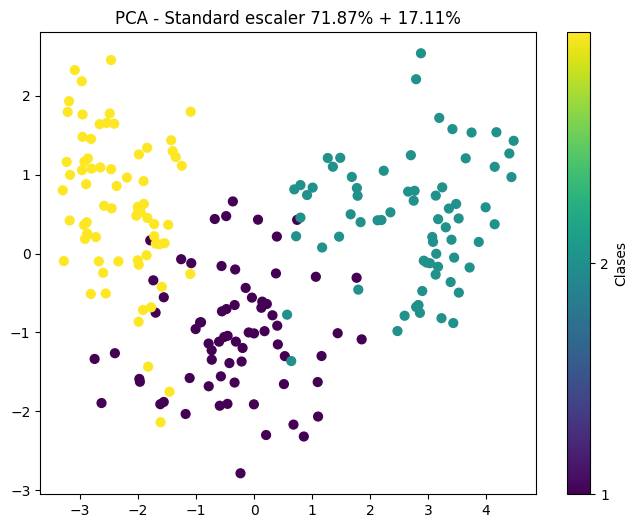

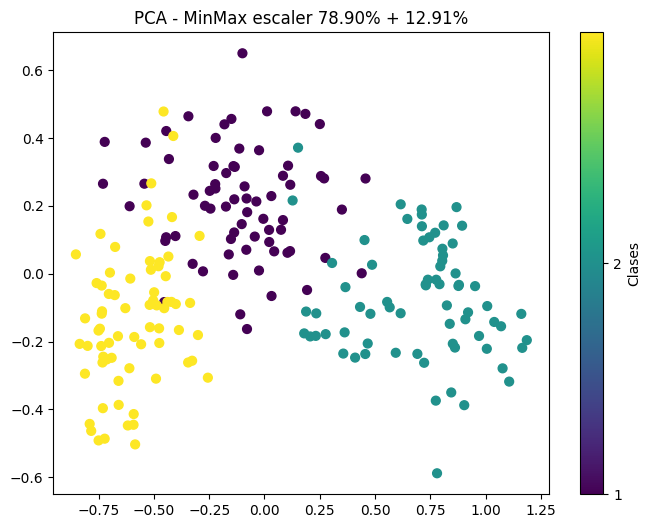

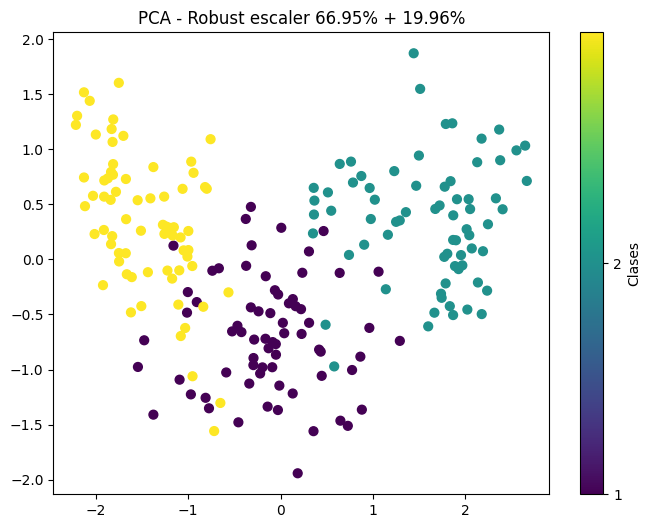

In [21]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
import matplotlib.pyplot as plt

dataset = pd.read_csv('semillas.csv')

dataset_p1 = dataset.copy()
dataset_p1 = dataset_p1.drop(columns=["clase"])
y = dataset["clase"]

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])


# Transformar
X_reduced = pipeline.fit_transform(dataset_p1)
pca = pipeline.named_steps['pca']

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualizar
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=y, s=40, cmap='viridis')
plt.title('PCA - Standard escaler {:.2%} + {:.2%}'.format(explained_variance[0], explained_variance[1]))
plt.colorbar(ticks=range(3), label='Clases')
plt.show()

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Transformar
X_reduced = pipeline.fit_transform(dataset_p1)
pca = pipeline.named_steps['pca']

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualizar
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=y, s=40, cmap='viridis')
plt.title('PCA - MinMax escaler {:.2%} + {:.2%}'.format(explained_variance[0], explained_variance[1]))
plt.colorbar(ticks=range(3), label='Clases')
plt.show()

pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Transformar
X_reduced = pipeline.fit_transform(dataset_p1)
pca = pipeline.named_steps['pca']

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Visualizar
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=y, s=40, cmap='viridis')
plt.title('PCA - Robust escaler {:.2%} + {:.2%}'.format(explained_variance[0], explained_variance[1]))
plt.colorbar(ticks=range(3), label='Clases')
plt.show()